## Условие 1:
Постройте график  
Назовите график  
Сделайте именование оси x и оси y  
Сделайте выводы  

### Задача 1.1
Скачать данные по ссылке https://www.kaggle.com/datasets/esratmaria/house-price-dataset-with-other-information

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Задача 1.2
Изучите стоимости недвижимости

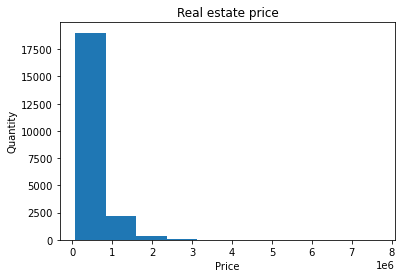

In [3]:
plt.hist(df['price'])
plt.title('Real estate price')
plt.xlabel('Price')
plt.ylabel('Quantity');

Вывод. Большая часть домов находится в ценовой категории до 800 000, около 19000, меньшая часть до 1 500 000, примерно 2000. Остальных ценовых категорий очень мало.

### Задача 1.3 
Изучите распределение квадратуры жилой

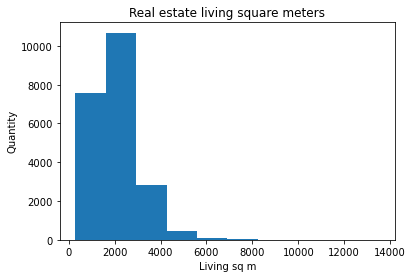

In [6]:
plt.hist(df['sqft_living'])
plt.title('Real estate living square meters')
plt.xlabel('Living sq m')
plt.ylabel('Quantity');

Вывод. В большинстве домов значение жилой площади лежит от 2000 до 3000, около 11000 домов, а также до 2000, около 7500 домов. Меньшая часть домов имеет имеет значение жилой площади от 3000 до 4000, около 3000. Значение более 4000 имеет очень малое количество домов.

### Задача 1.4 
Изучите распределение года постройки

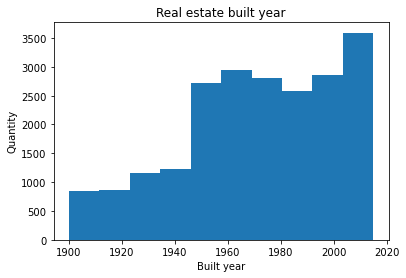

In [7]:
plt.hist(df['yr_built'])
plt.title('Real estate built year')
plt.xlabel('Built year')
plt.ylabel('Quantity');

Вывод. Большая часть домов построена после 1950 года, с примерно равным распределением по годам. Меньшая часть домов, около 4000 построена до 1950 года, с таким же примерно равным распределением.

## Условие 2
Постройте график  
Сделайте выводы
### Задача 2.1 
Изучите распределение домов от наличия вида на набережную

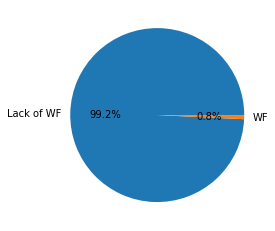

In [14]:
data = df['waterfront'].replace([0, 1], ['Lack of WF', 'WF']).value_counts()

names = data.index
values = data.values

plt.pie(values, autopct='%.1f%%', labels=names);

Вывод. Домов с видом на набережную всего 0,8 %

### Задача 2.2 
Изучите распределение этажей домов

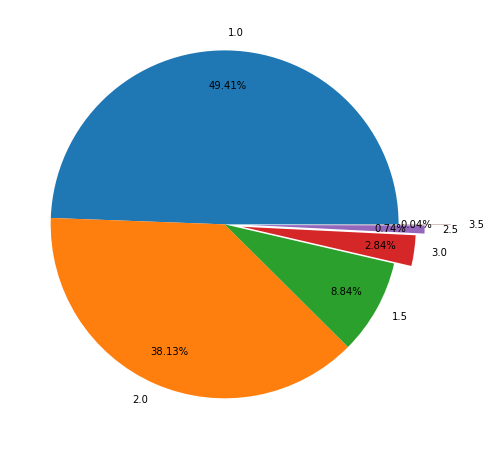

In [35]:
data = df['floors'].value_counts()

names = data.index
values = data.values



plt.figure(figsize=(8, 8))
plt.pie(values, autopct='%.2f%%', pctdistance= 0.8, explode = [0, 0, 0, 0.1, 0.15, 0.3], labels=names);

Вывод. Большая часть домов 1, 1,5 или 2-х этажные, около 96,5 %. Домов выше 2-х этажей всего 3,5 %.

### Задача 2.3 
Изучите распределение состояния домов

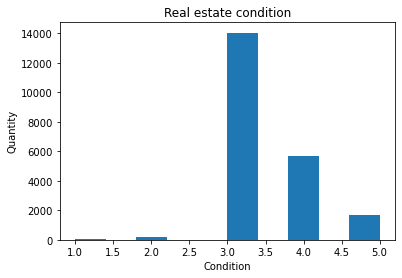

In [34]:
plt.hist(df['condition'])
plt.title('Real estate condition')
plt.xlabel('Condition')
plt.ylabel('Quantity');

Вывод. Большая часть домов находится в удовлетворительном состоянии, около 14000. Количество домов более высокого состояния, около 8000. Количество домов плохого состояния минимально.  

## Условие 3:
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.


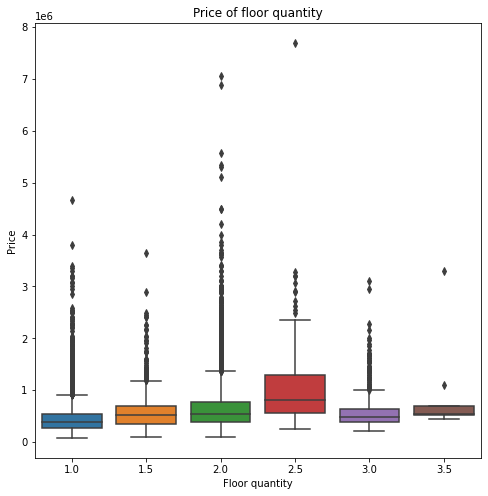

In [38]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df['floors'], y=df['price'])

plt.title('Price of floor quantity')
plt.xlabel('Floor quantity')
plt.ylabel('Price');

Вывод. Цена на 1.5, 2, 3 и 3.5 этажные дома в среднем находится на одном уровне. Самая высокая цена в среднем на 2,5 этажные дома. Самая низкая цена на 1 этажные дома.

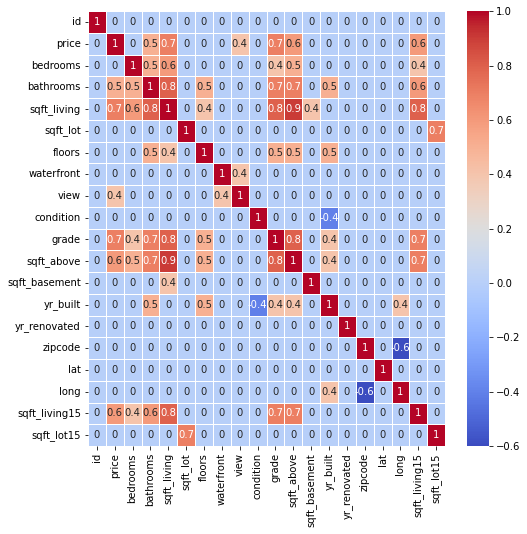

In [41]:
matrix = df.corr()
matrix = np.round(matrix, 1)
matrix[np.abs(matrix) < 0.4] = 0

plt.figure(figsize=(8,8))
matrix
sns.heatmap(matrix, annot = True, linewidths= 0.5, cmap= 'coolwarm');

Вывод. Присутствует обратная связь между годом постройки и состоянием недвижимости (-0.4). Присутствует значительная связь между размером недвижимости и ценой (0.7). Также от количества площади зависит и количество спален и ванных комнат (0.6 и 0.8).

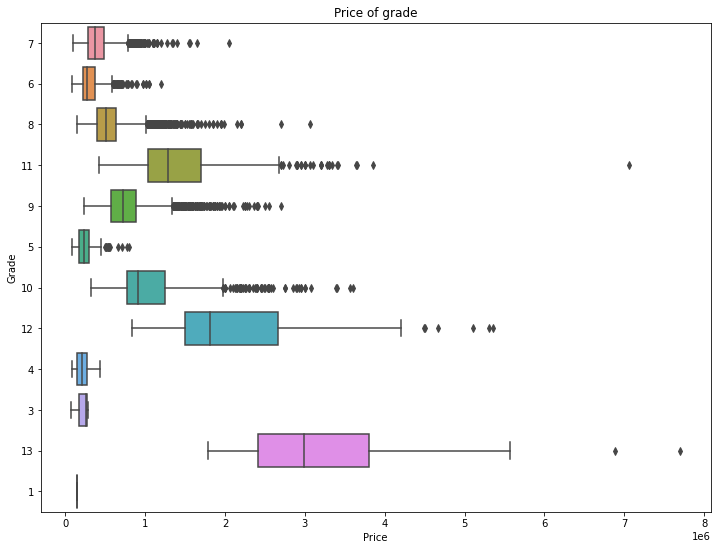

In [43]:
plt.figure(figsize=(12, 9))
sns.boxplot(x=df['price'], y=df['grade'].astype('str'))

plt.title('Price of grade')
plt.xlabel('Price')
plt.ylabel('Grade');

Вывод. Явно прослеживается прямая зависимость цены от оценки.

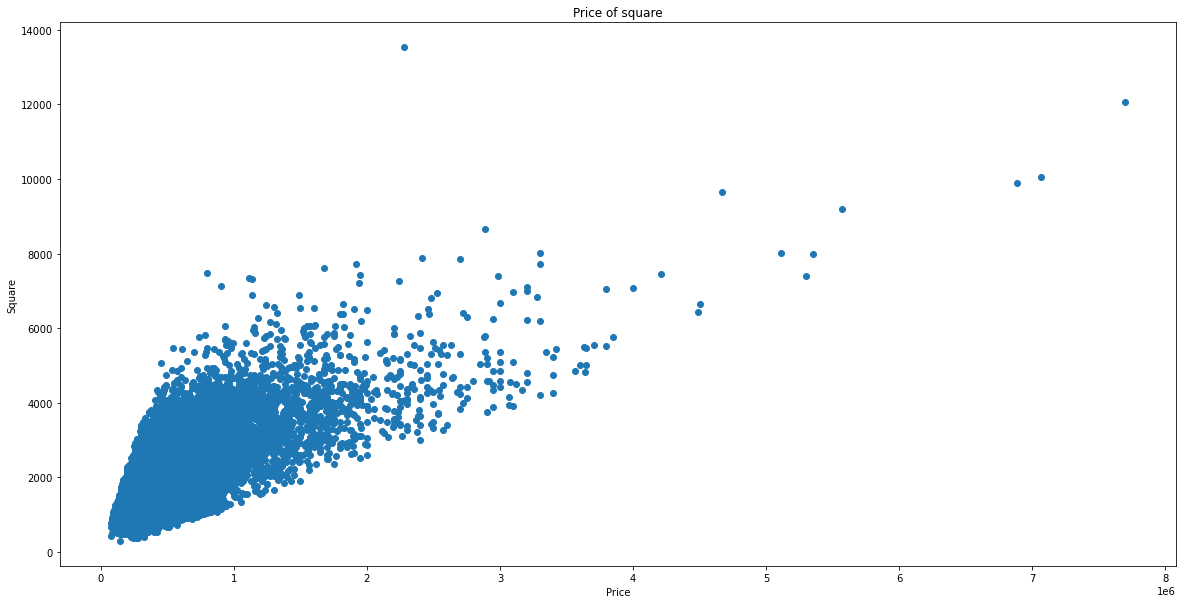

In [46]:
plt.figure(figsize=(20, 10))
plt.scatter(df['price'], df['sqft_living'])

plt.title('Price of square')
plt.xlabel('Price')
plt.ylabel('Square');

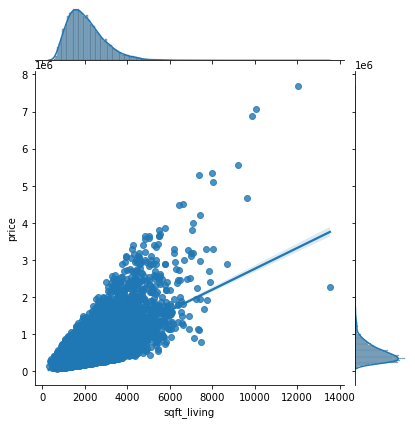

In [49]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg');

Вывод. Можно явно увидеть зависимость цены от жилой площади.